<h3><font color='blue'>===========================================</font></h3>
<h1>K Means Clustering</h1>
<h2>Unsupervised Learning Algorithm</h2>
<ul>
<li>Market segmentations, population groups, image compression etc</li><br>
<li>We wish to find homogeneous, distinct clusters. Each of which while being different from the rest should have the least variance for points included in the cluster</li><br>
<li>Choosing the number of clusters is more often than not a function of domain knowledge. There is an elbow method to derive this from analysis but would not be incorrect to view it as better obtained through knowledge and experience -eg the ubiquitous xs,s,m,l,xl sizes for clothing</li><br>
<li>The algorithm works by randomly initializing the required number of clusters. Assign each of the points to the cluster basis the distance (mostly euclidean distance) between the points, computing the centroids and repeating, the overall distance of the points included in the cluster and repeating till we find that the cost reduction produced is neglibible</li><br>
</ul>
<h3><font color='blue'>===========================================</font></h3>

$c^{(i)}$ = index of cluster (1,2,...,K) to which example $x^{(i)}$ is currently assigned

$μ^k$ = cluster centroid k $(μ^k\;∈\;R_n)$

$μ_{c^{(i)}}$ = cluster centroid of cluster to which example $x^{(i)}$ has been assigned

Using these variables we can define our cost function:

$J(c^{(1)},…,c^{(m)},μ_1,…,μ_K)=\dfrac {1}{m} \displaystyle \sum_{i=1}^m{||\ x^{(i)}−μ_{c^{(i)}}\ ||}^2$

Our optimization objective is to minimize all our parameters using the above cost function:

$min_{c,μ} J(c,μ)$

In [23]:
% pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
# Lets use scikit facilities to create some clustered blobs
from sklearn.datasets import make_blobs
X,y = make_blobs( n_samples = 150, 
                 n_features = 2, 
                 centers = 3, 
                 cluster_std = 0.6,
                 shuffle = True,
                 random_state = 0
                )

In [25]:
# Let's do some prelim work to figure out how we will cluster 
# an array of two feature vectors
np.random.seed(33)
print( 'The array to cluster and the beginning arbitrary centroids')
testarr = np.random.randint(2,10,(4,2))
print( testarr)
print('The initial arbitrary centroids: ')
carr = np.random.randint(1,4,(3,2))
print( carr)
print( '\nLets see the steps to find the euclidean distance of the points of the array from the first centroid\n')
print( '\nsubtract first row from each of the testarr row\n')
print ( testarr - carr[0] )
print( 'square it')
print( ( testarr - carr[0] ) * ( testarr - carr[0]))
print( '\nsquare root it and print  - we have the distance of each of the points of the array from centroid 1 \n')
print(  np.sqrt(  np.sum( ( testarr - carr[0] ) * ( testarr - carr[0] ),
                                       axis = 1 ) ).reshape(4,1) )


The array to cluster and the beginning arbitrary centroids
[[6 9]
 [2 4]
 [4 3]
 [3 5]]
The initial arbitrary centroids: 
[[3 2]
 [3 1]
 [3 2]]

Lets see the steps to find the euclidean distance of the points of the array from the first centroid


subtract first row from each of the testarr row

[[ 3  7]
 [-1  2]
 [ 1  1]
 [ 0  3]]
square it
[[ 9 49]
 [ 1  4]
 [ 1  1]
 [ 0  9]]

square root it and print  - we have the distance of each of the points of the array from centroid 1 

[[ 7.61577311]
 [ 2.23606798]
 [ 1.41421356]
 [ 3.        ]]


In [26]:
#Now lets compute the centroids for a large array
noCentroids = 3
noFeatures = 2
noIterations = 200
noExamples = 150
tol = 1e-4

def computeCentroids(XAB, noExamples, noFeatures, noCentroids, noIterations):
    
    minX =  np.min(XAB)
    maxX =  np.max(XAB)
    tol = 1e-4
    costChange = 0
    
    np.random.seed(100)
    centroids = np.zeros( ( noCentroids, noFeatures ) )
    dataCentroids = np.zeros(noExamples)
    cost = np.zeros(noIterations)
    # arbitrarily initialize the required number of centroids
    for x in range(noCentroids):
        centroids[x] = np.random.uniform(0, 1, 2) * np.array([minX, maxX])
    print ('The initial centroids are:\n', centroids  )
    
    # Lets have an array to hold the distances of the points from the centroids
    distArray = np.zeros((noExamples, noCentroids) )
    
    # Lets run iterations
    for x in range(noIterations):
        
        for k in range(noCentroids) :
            # calcualte difference
            diff = XAB - centroids[k]
            # square the difference
            squaredDiff = diff * diff
            # store the square root of the sum of the squared differences
            distArray[:,k] = np.sqrt( np.sum( squaredDiff, axis = 1) )
            cost[x] += np.sum(distArray[:,k])
        
        # The cluster for each of the points is the one which is the least away
        dataCentroids = np.argmin(distArray,axis = 1)
#         print '\nThe dataCentroids are ' , dataCentroids
        for k in range( noCentroids ):
#             print '\nXAB datacentroids = k', k, XAB[dataCentroids == k ]
            centroids[k] = np.mean( XAB[dataCentroids == k], axis = 0)
        print ('\rThe centroids now are: ',centroids)
        
        # Lets track the cost and run iterations till we are seeing a reduction in the cost
        if x == 0:
            costChange  = cost[x]
            print ('cost after iteration %d is %.2f and costChange  is %.2f' % ( x+1,cost[x],costChange ))
        else :
            costChange  = np.abs(cost[x] - cost[x-1])
            print ('cost after iteration %d is %.2f and costChange  is %.2f' % ( x+1,cost[x] - cost[x-1],costChange ))
        
        if costChange  <  tol:
            print ('Exiting after iteration ', x)
            break
    return centroids, dataCentroids

centroids, dataCentroids = computeCentroids(X,noExamples,noFeatures,noCentroids,noIterations)

    
print ('The centroids finally are:\n',centroids)
print ('\nThe dataCentroids are ' , dataCentroids)

The initial centroids are:
 [[-1.49181757  1.52386432]
 [-1.16543438  4.62451791]
 [-0.01295475  0.66550007]]
The centroids now are:  [[-1.59709668  2.58050191]
 [ 0.16485848  4.10915487]
 [ 2.07251948  1.02229366]]
cost after iteration 1 is 1341.25 and costChange  is 1341.25
The centroids now are:  [[-1.68201208  2.90538803]
 [ 0.84632122  4.29857875]
 [ 2.06720741  0.97411618]]
cost after iteration 2 is -165.43 and costChange  is 165.43
The centroids now are:  [[-1.60829496  2.92326714]
 [ 0.9243041   4.36429108]
 [ 2.06720741  0.97411618]]
cost after iteration 3 is 16.00 and costChange  is 16.00
The centroids now are:  [[-1.60829496  2.92326714]
 [ 0.9243041   4.36429108]
 [ 2.06720741  0.97411618]]
cost after iteration 4 is -0.05 and costChange  is 0.05
The centroids now are:  [[-1.60829496  2.92326714]
 [ 0.9243041   4.36429108]
 [ 2.06720741  0.97411618]]
cost after iteration 5 is 0.00 and costChange  is 0.00
Exiting after iteration  4
The centroids finally are:
 [[-1.60829496  2

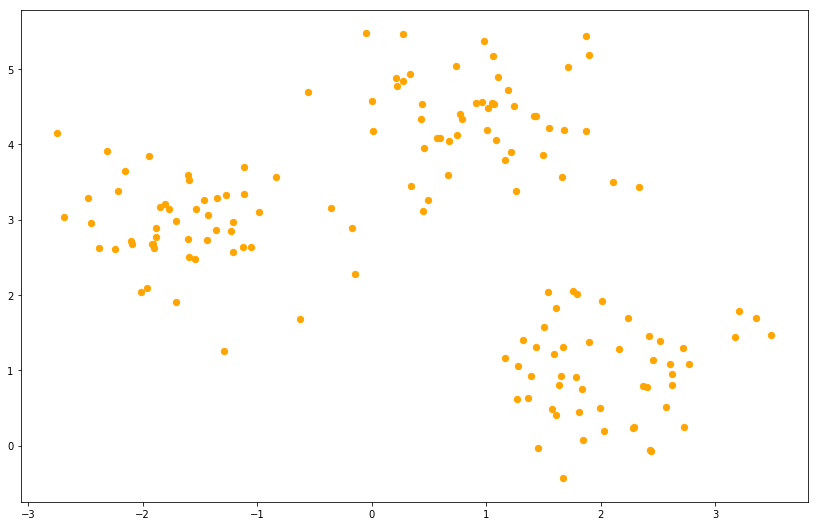

In [31]:
# Lets plot the clusters
fig = figure()
plt.scatter( X[:,0], X[:,1], c='orange',marker='o',s=40)
plt.tight_layout()
fig.set_size_inches(12,8)

In [32]:
# Lets use scikit kmeans
from sklearn.cluster import KMeans

km = KMeans( 
    n_clusters = 3,
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-4,
    random_state = 0 )

y_km = km.fit_predict( X )
y_km


array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [33]:
# Lets compare the centroids we computed and the ones we got through kmeans
print (km.cluster_centers_)
print (type(km.cluster_centers_), km.cluster_centers_.shape)
print (centroids, centroids.shape)

[[ 0.9243041   4.36429108]
 [ 2.06720741  0.97411618]
 [-1.60829496  2.92326714]]
<class 'numpy.ndarray'> (3, 2)
[[-1.60829496  2.92326714]
 [ 0.9243041   4.36429108]
 [ 2.06720741  0.97411618]] (3, 2)


In [34]:
print(y_km)
print(X[y_km==0,0])
print(X[y_km==0,1])

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]
[  4.43598630e-01   7.67522789e-01   4.38990142e-01   1.71444449e+00
   1.89593761e+00   1.86922139e+00   6.70478769e-01  -1.84892963e-03
   5.72793810e-01   1.16411070e+00   1.06269622e+00   1.25566754e+00
   2.24592863e-01   5.95676822e-01   1.19008992e+00   2.13979079e-01
   2.33812285e+00   1.54632313e+00   3.33818506e-01   1.10123507e+00
   6.69786996e-01   1.41372442e+00   1.08272576e+00   1.05241733e+00
  -5.55523811e-01  -4.74920358e-02   1.65991049e+00   2.72396035e-01
   7.89338559e-01   1.68353782e+00   9.59360742e-01   3.47138300e-01
   1.24258802e+00   1.00372519e+00   7.34363910e-01   2.10616050e+00
   1.06923853e+00   1.87271752e+00   9.14338767e-01   2.77180174e-01
   7

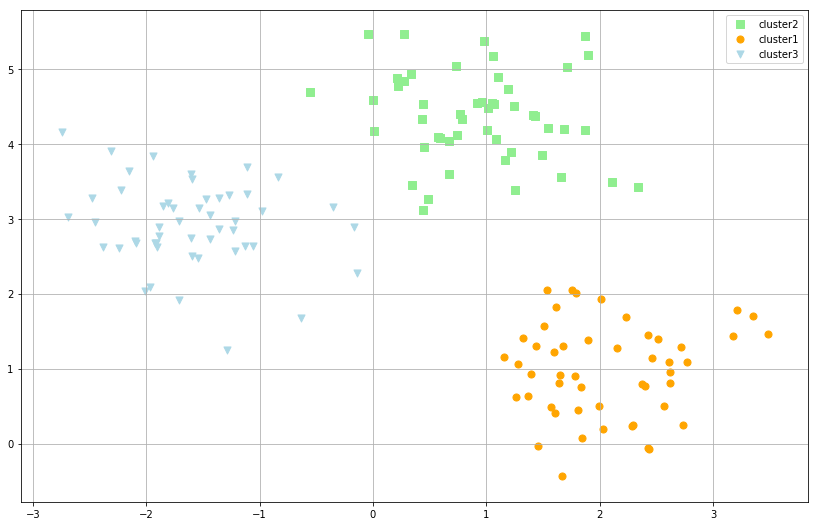

In [35]:
# Lets plot he clusters
fig = figure()
plt.scatter(X[y_km == 0,0],
           X[y_km == 0, 1],
           s=50, c='lightgreen',
           marker='s',
           label = 'cluster2')
plt.scatter(X[y_km == 1,0],
           X[y_km == 1, 1],
           s=50, c='orange',
           marker='o',
           label = 'cluster1')
plt.scatter(X[y_km == 2,0],
           X[y_km == 2, 1],
           s=50, c='lightblue',
           marker='v',
           label = 'cluster3')
plt.legend()
plt.grid()
plt.tight_layout()
fig.set_size_inches(12,8)

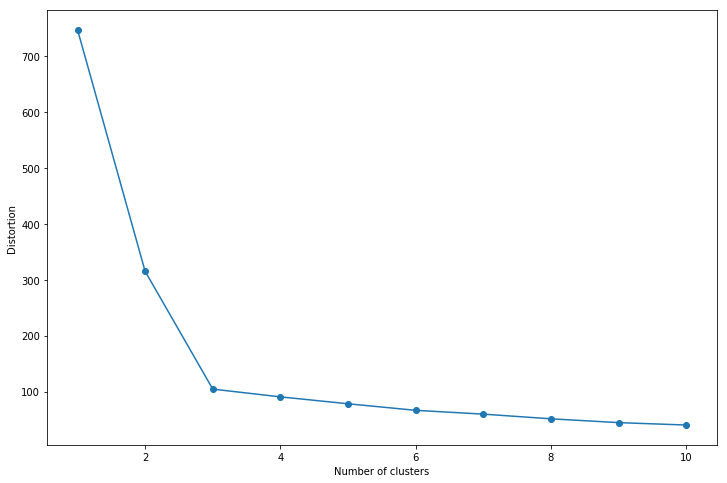

In [36]:
# Lets see the elbow method we can use 
fig = figure()
distortions = []
for i in range(1,11):
    km = KMeans( n_clusters=i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0 )
    km.fit(X)
    distortions.append( km.inertia_)
plt.plot( range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
fig.set_size_inches(12,8)

<h3><font color='blue'>========================================================================================</font></h3>
<h3>We will use KMeans to cluster digits</h3>
<br>
<h3>We will see the scikit metrics constructs for evaluating clustering</h3>
<p>
From the documentaiton :
 The Rand Index computes a similarity measure between two clusterings
    by considering all pairs of samples and counting pairs that are
    assigned in the same or different clusters in the predicted and
    true clusterings.

    The raw RI score is then "adjusted for chance" into the ARI score
    using the following scheme::

        ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
 </p>
 <p>
 Homogeneity score:<br>
 A clustering result satisfies homogeneity if all of its clusters
    contain only data points which are members of a single class.
 </p>
 <p>
 Completeness score:<br>
 A clustering result satisfies completeness if all the data points
    that are members of a given class are elements of the same cluster
    </p>
        
<h3><font color='blue'>========================================================================================</font></h3>

In [11]:
# Lets explore the digits data

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

# Lets take a look at the shape of the digits data and target
# Look at some sample data and a count of the number of instances
# for each digit in the dataset 

print(digits.data.shape , digits.target.shape)
print( digits.data[:2] )
print(digits.target[:100])
numbers, numberscounts = np.unique(digits.target,return_counts=True)
print(sum(numberscounts))
print(np.asarray((numbers,numberscounts)))




(1797, 64) (1797,)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]
1797
[[  0   1   2   3   4   5   6   7   8   9]
 [178 182 177 183 181 182 181 179 174 180]]


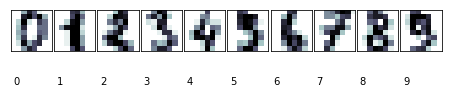

In [37]:
def print_digits( images, y, max_n = 10 ):
    fig = plt.figure( figsize = (12,12))
    fig.subplots_adjust(left =0, right = 1, bottom = 0, top = 1,
                        hspace = 0.05, wspace = 0.05 )
    i = 0
    while i < max_n and i < images.shape[0] :
        p = fig.add_subplot( 20, 20, i + 1, xticks = [], yticks = [] )
        p.imshow( images[i], cmap = plt.cm.bone_r )
        p.text( 0, 14, str( y[i]) )
        i += 1

print_digits( digits.images , digits.target,  10)

n_digits 1347, 	n_samples, 1347 	n_features 64


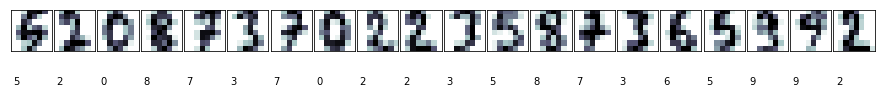

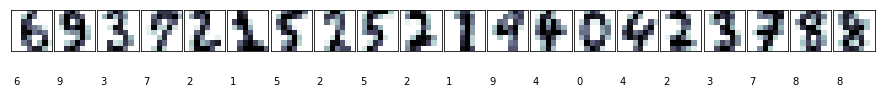

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split( 
    data, digits.target, digits.images, test_size = 0.25, random_state = 42
)

n_samples, n_features = X_train.shape
n_digits = len( np.unique(y_train))
labels = y_train

print_digits( images_train,y_train,20)
print_digits( images_test, y_test, 20)

print ( 'n_digits %d, \tn_samples, %d \tn_features %d' % 
       (n_samples,n_samples,n_features))

(1347,)
[1 3 2 0 6 8 6 2 3 3]


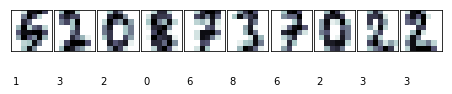

In [39]:
clf = KMeans( init = 'k-means++', n_clusters = 10, random_state = 42)
clf.fit( X_train)
print (clf.labels_.shape)
print( clf.labels_[:10])
print_digits( images_train, clf.labels_, 10)

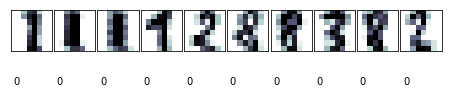

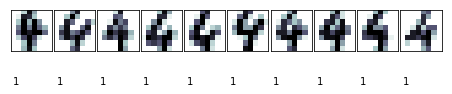

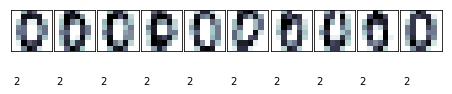

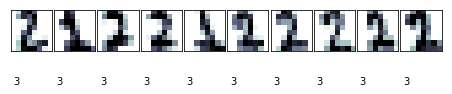

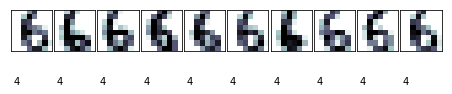

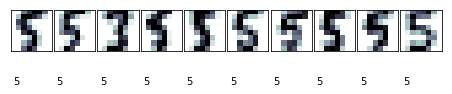

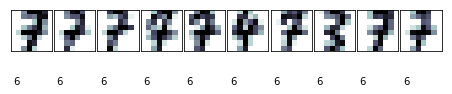

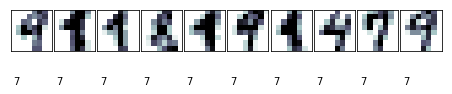

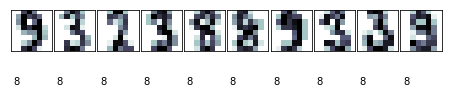

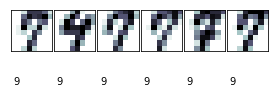

In [40]:
y_pred = clf.predict(X_test)
# print(y_pred)
def predict_cluster( images, y_pred, cluster_number ):
#     print(y_pred == cluster_number)
    images = images[ y_pred == cluster_number ]
    y_pred = y_pred [ y_pred == cluster_number ]
    print_digits( images, y_pred, 10 )
    
for i in range(10):
    predict_cluster( images_test, y_pred, i )

## Clustering Metrics
### Silhouette Coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

    a: The mean distance between a sample and all other points in the same class.
    b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$s = \frac{b - a}{max(a, b)}$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, clf.labels_, metric='l2')

0.14147819670796544

### Clustering Metrics
#### Adjusted Rand Index Score
Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization

If C is a ground truth class assignment and K the clustering, let us define a and b as:

    a, the number of pairs of elements that are in the same set in C and in the same set in K
    b, the number of pairs of elements that are in different sets in C and in different sets in K

The raw (unadjusted) Rand index is then given by:

$\text{RI} = \frac{a + b}{C_2^{n_{samples}}}$

Where C_2^{n_{samples}} is the total number of possible pairs in the dataset (without ordering).

However the RI score does not guarantee that random label assignments will get a value close to zero (esp. if the number of clusters is in the same order of magnitude as the number of samples).

To counter this effect we can discount the expected RI E[$\text{RI}$] of random labelings by defining the adjusted Rand index as follows:

$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$

# Homogeneity, Completeness
Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

    homogeneity: each cluster contains only members of a single class.
    completeness: all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):


In [16]:
metrics.completeness_score??

Object `metrics.completeness_score` not found.


In [17]:
from sklearn import metrics
print( 'Adjusted rand score:{:.2}'.format(metrics.adjusted_rand_score(y_test,y_pred)))
print( 'Homogeneity score:{:.2}'.format(metrics.homogeneity_score(y_test,y_pred)))
print( 'Completeness score:{:.2}'.format(metrics.completeness_score(y_test,y_pred)))
print( 'Confustion Matrix:\n')
print( metrics.confusion_matrix(y_test,y_pred))

Adjusted rand score:0.57
Homogeneity score:0.69
Completeness score:0.73
Confustion Matrix:

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


# Types of clustering

## MiniBatchKMeans
The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm

## Hierarchical clustering
In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types

    Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
    Divisive: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram